In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
pd.options.display.max_rows = 100
file3 = pd.read_csv(r'file:///Users/kaan/Desktop/Data_Marketing_Customer_Analysis_Round3.csv')


In [11]:
file3
#checking if there are highly correlated features

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [12]:
#checking if there are highly correlated features
# Compute the correlation matrix
corr_matrix = file3.corr()
# Find highly correlated variables
highly_correlated = corr_matrix[corr_matrix > 0.9]
# Print the highly correlated variables
print(highly_correlated)
#no high correlation among variables

                               customer_lifetime_value  income  \
customer_lifetime_value                            1.0     NaN   
income                                             NaN     1.0   
monthly_premium_auto                               NaN     NaN   
months_since_last_claim                            NaN     NaN   
months_since_policy_inception                      NaN     NaN   
number_of_open_complaints                          NaN     NaN   
number_of_policies                                 NaN     NaN   
total_claim_amount                                 NaN     NaN   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                         NaN                      NaN   
income                                          NaN                      NaN   
monthly_premium_auto                            1.0                      NaN   
months_since_last_claim                         NaN                      1.0   
month

/var/folders/g_/bb6gz93s0kq9d0zgw1cdzmww0000gn/T/ipykernel_83170/399208592.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = file3.corr()


In [9]:
#categorical variables in the categoricals data frame that I have created in Activity 3
categories = ["object"]
categorical = file3.select_dtypes(include = object)
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [31]:
#ordinal Encoding

encoder = LabelEncoder()


file3['coverage_encoded'] = encoder.fit_transform(file3['coverage'])


file3['education_encoded'] = encoder.fit_transform(file3['education'])


file3['policy_encoded'] = encoder.fit_transform(file3['policy'])


file3['vehicle_size_encoded'] = encoder.fit_transform(file3['vehicle_size'])

file3_encoded.drop(columns=['coverage', 'education', 'policy', 'vehicle_size'], inplace=True)

file3


,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,coverage_encoded,education_encoded,policy_encoded,vehicle_size_encoded
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,corporate l3,offer3,agent,292,four-door car,medsize,0,1,2,1
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,personal l3,offer4,call center,744,four-door car,medsize,0,1,5,1
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,personal l3,offer3,call center,480,suv,medsize,0,0,5,1
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,corporate l3,offer2,branch,484,four-door car,medsize,1,1,2,1
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,personal l2,offer1,branch,707,four-door car,medsize,2,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,personal l1,offer3,web,1214,luxury car,medsize,2,0,3,1
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,personal l3,offer2,branch,273,four-door car,medsize,0,1,5,1
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,corporate l3,offer1,web,381,luxury suv,medsize,1,0,2,1
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,personal l1,offer1,branch,618,suv,medsize,2,1,3,1


In [27]:
#one hot encoding

# Select the columns to encode
columns_to_encode = ['response', 'sales_channel', 'gender', 'employment_status', 'marital_status',
                     'location_code', 'region', 'month', 'policy_type', 'vehicle_class']


encoded_data = pd.get_dummies(file3[columns_to_encode])

file3_encoded = pd.concat([file3, encoded_data], axis=1)


file3_encoded.drop(columns=columns_to_encode, inplace=True)

file3_encoded


,customer_lifetime_value,coverage,education,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,...,month_jan,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,4809,basic,college,2/18/11,48029,61,7,52,0,9,...,0,1,0,0,1,0,0,0,0,0
1,2228,basic,college,1/18/11,92260,64,3,26,0,1,...,1,0,1,0,1,0,0,0,0,0
2,14947,basic,bachelor,2/10/11,22139,100,34,31,0,2,...,0,0,1,0,0,0,0,0,1,0
3,22332,extended,college,1/11/11,49078,97,10,3,0,2,...,1,1,0,0,1,0,0,0,0,0
4,9025,premium,bachelor,1/17/11,23675,117,33,31,0,7,...,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,premium,bachelor,1/19/11,61541,253,12,40,0,7,...,1,0,1,0,0,1,0,0,0,0
10685,5259,basic,college,1/6/11,61146,65,7,68,0,6,...,1,0,1,0,1,0,0,0,0,0
10686,23893,extended,bachelor,2/6/11,39837,201,11,63,0,2,...,0,1,0,0,0,0,1,0,0,0
10687,11971,premium,college,2/13/11,64195,158,0,27,4,6,...,0,0,1,0,0,0,0,0,1,0


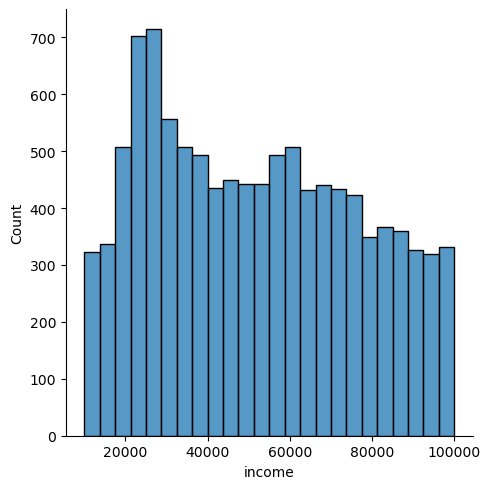

In [32]:
#varA = income, checking the histogram first before minmax transform
sns.displot(file3['income'], kde=False)

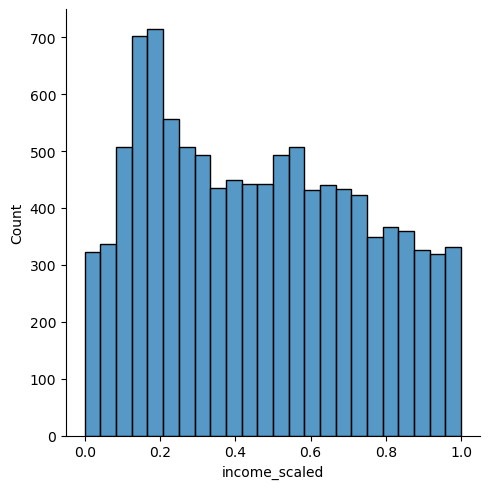

In [33]:
#varA = income, checking the histogram after minmax transform


scaler = MinMaxScaler()


file3['income_scaled'] = scaler.fit_transform(file3[['income']])


sns.displot(file3['income_scaled'], kde=False)

#did not change

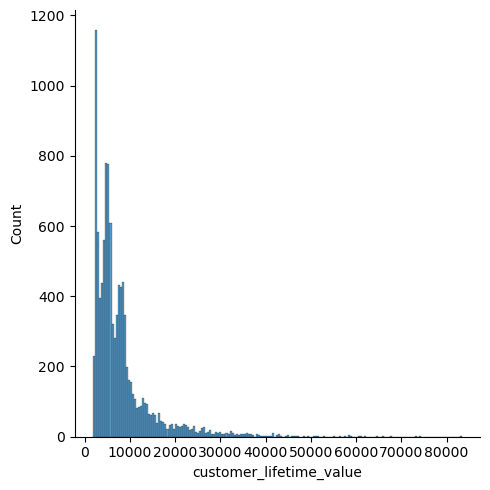

In [34]:
#varB customer_lifetime_value checking the histogram first before PowerTransform 
sns.displot(file3['customer_lifetime_value'], kde=False)
#right-skewed

In [51]:
data = file3.copy()
scaler.fit(X_train)

transformer = PowerTransformer()
data['customer_lifetime_value_transformed'] = transformer.fit_transform(data[['customer_lifetime_value']])
data

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,sales_channel,total_claim_amount,vehicle_class,vehicle_size,coverage_encoded,education_encoded,policy_encoded,vehicle_size_encoded,income_scaled,customer_lifetime_value_transformed
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,agent,292,four-door car,medsize,0,1,2,1,0.422396,-0.336143
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,call center,744,four-door car,medsize,0,1,5,1,0.914158,-1.867205
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,call center,480,suv,medsize,0,0,5,1,0.134550,1.292270
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,branch,484,four-door car,medsize,1,1,2,1,0.434059,1.731625
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,branch,707,four-door car,medsize,2,0,4,1,0.151628,0.646025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,web,1214,luxury car,medsize,2,0,3,1,0.572623,1.339279
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,branch,273,four-door car,medsize,0,1,5,1,0.568231,-0.183187
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,web,381,luxury suv,medsize,1,0,2,1,0.331317,1.799731
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,branch,618,suv,medsize,2,1,3,1,0.602130,1.021741


Transformed - Mean: 4.18787467049175e-15, Std: 1.0000467803429267, Skewness: 0.04342210231556743


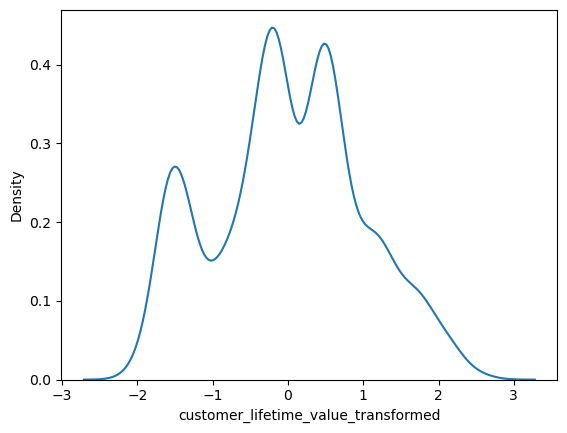

In [53]:
mean_transformed = data['customer_lifetime_value_transformed'].mean()
std_transformed = data['customer_lifetime_value_transformed'].std()
skew_transformed = data['customer_lifetime_value_transformed'].skew()
sns.kdeplot(data['customer_lifetime_value_transformed'], label='Transformed')
print("Transformed - Mean: {}, Std: {}, Skewness: {}".format(mean_transformed, std_transformed, skew_transformed))
